https://github.com/yumingj/DeepFashion-MultiModal?tab=readme-ov-file

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Get the mask of the top

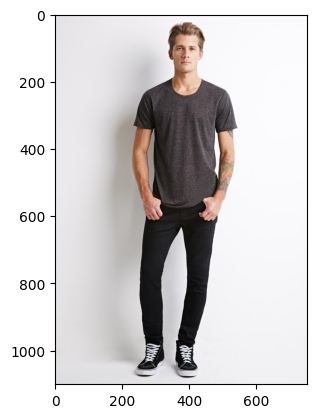

In [2]:
# Load the original image 
# original_img_path = 'data/images/WOMEN-Tees_Tanks-id_00000007-01_4_full.jpg'
original_img_path = 'data/images/MEN-Denim-id_00000080-01_7_additional.jpg'  # Replace with your image path
original_img = Image.open(original_img_path)
original_img = np.array(original_img)

plt.imshow(original_img)

# Load the segmentation map
# segm_path = 'data/segm/WOMEN-Tees_Tanks-id_00000007-01_4_full_segm.png'
segm_path = 'data/segm/MEN-Denim-id_00000080-01_7_additional_segm.png'  # Replace with your segmentation map path
segm = Image.open(segm_path)
segm = np.array(segm)

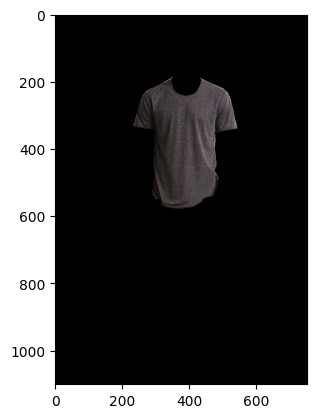

In [3]:
# Define the label for the 'top' (shirt)
top_label = 1

# Create a mask for the 'top' label
top_mask = (segm == top_label)

# Invert the 'top' mask to get the non-'top' (background) mask
background_mask = ~top_mask

# Apply the background mask to the original image
shirt_with_non_top_bg = original_img.copy()
shirt_with_non_top_bg[background_mask] = 0  # Set background pixels to black

# Save the shirt with a non-'top' background as a PNG file
output_path = 'shirt_with_non_top_bg.png'
shirt_with_non_top_bg_img = Image.fromarray(shirt_with_non_top_bg)
shirt_with_non_top_bg_img.save(output_path)

# Display the result
plt.imshow(shirt_with_non_top_bg_img)
plt.show()


In [4]:
# Load the shirt and print images as NumPy arrays
shirt = shirt_with_non_top_bg

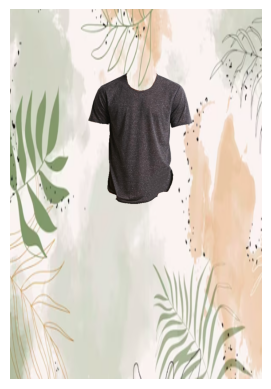

In [5]:
# Load the print image
print_img_path = 'art_print/art_print1.png'  # Replace with the path to your print image
print_img = Image.open(print_img_path)
print_img = np.array(print_img)

# Resize the print image to match the size of the original image (shirt)
print_img = Image.fromarray(print_img)
print_img = print_img.resize((original_img.shape[1], original_img.shape[0]))

# Convert the print image to a NumPy array
print_img = np.array(print_img)[:,:,:3]

# Overlay the shirt on top of the print image
overlayed_img = print_img.copy()
overlayed_img[top_mask] = original_img[top_mask]

# Display the overlayed image
plt.imshow(overlayed_img)
plt.axis('off')
plt.show()